___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [2]:
df = pd.read_csv("store_sharing.csv")

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [3]:
df.duplicated().value_counts()

False    17414
dtype: int64

In [4]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

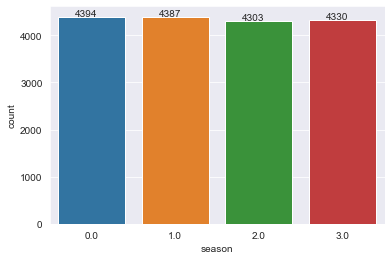

In [10]:
ax = sns.countplot(data = df, x = 'season')
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));
# mevsimlere göre alınan kayıtların sayısı

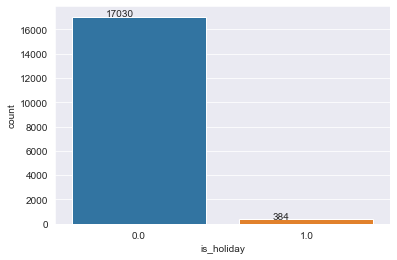

In [9]:
ax = sns.countplot(df.is_holiday);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

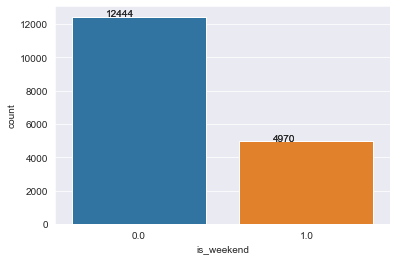

In [7]:
sns.countplot(df.is_weekend);
ax = sns.countplot("is_weekend", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));
# hafta içi ve hafta sonuna ait recordların sayısı
#yani satırların sayısı

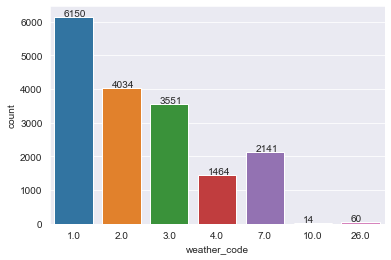

In [8]:
ax = sns.countplot("weather_code", data=df);
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+20));

### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [11]:
df.timestamp = pd.to_datetime(df.timestamp)

In [14]:
df.set_index(df.timestamp, inplace=True)

In [16]:
df.drop('timestamp',axis=1,inplace=True)

In [17]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [19]:
df['year_month']= df.index.strftime('%Y-%m')
df['year'] = df.index.year
df['month']= df.index.month
df['day_of_month']= df.index.day
df['day_of_week']=df.index.dayofweek
df['hour']=df.index.hour

In [21]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

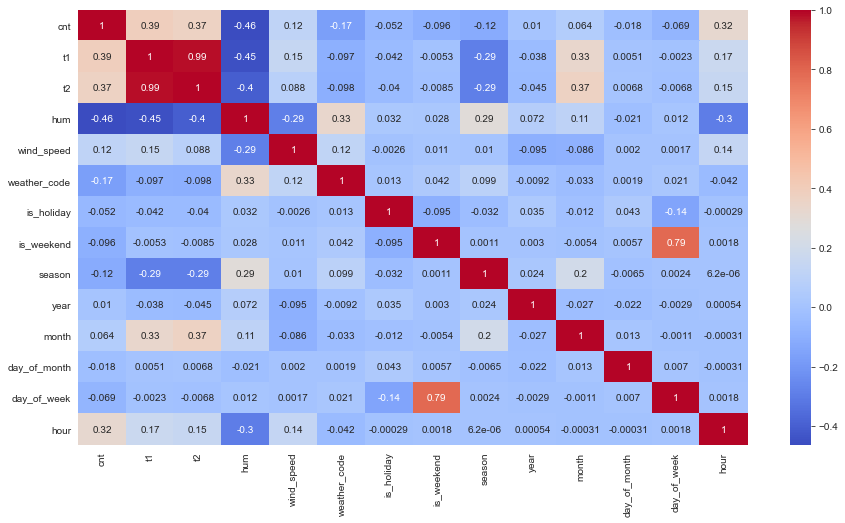

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [24]:
a = df.corr().loc[:,['cnt']]

In [25]:
a = a.sort_values(by='cnt',ascending=False)

<AxesSubplot:>

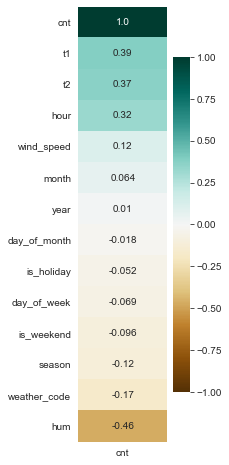

In [37]:
plt.figure(figsize=(2,8))
sns.heatmap(a,annot = True, cmap = 'BrBG', vmin = -1,vmax=1,fmt= '.2')

### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

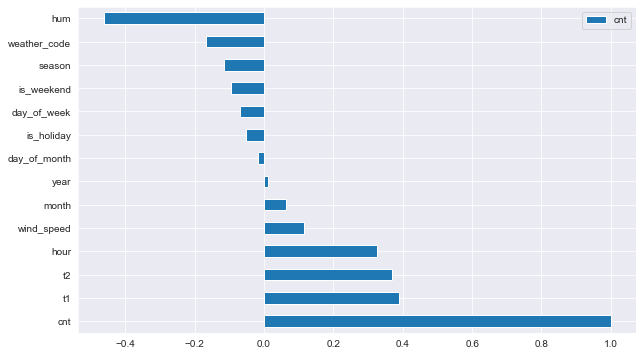

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
a.plot(kind = 'barh',ax = ax)

### 9.Plot bike shares over time use lineplot

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

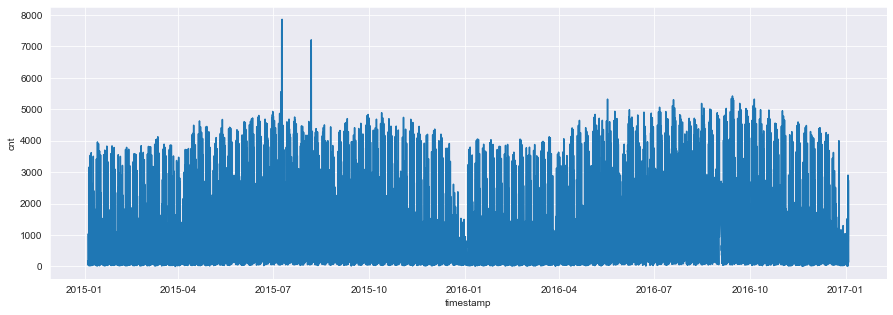

In [73]:
plt.figure(figsize=(15,5))
sns.lineplot(df.index,df.cnt)

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

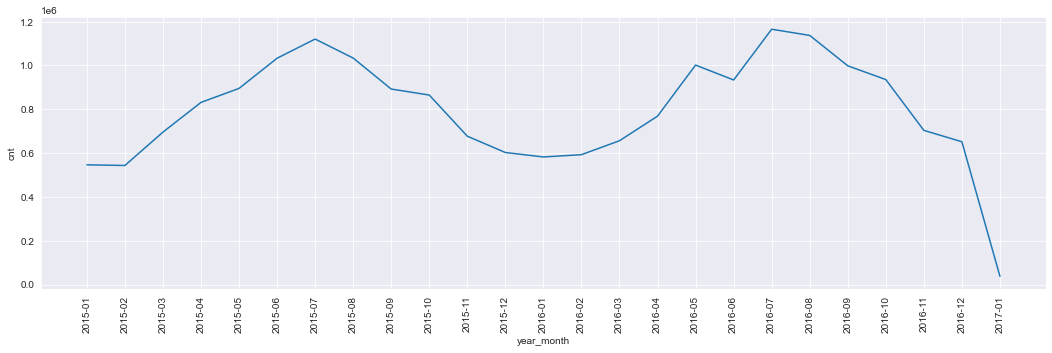

In [88]:
plt.figure(figsize=(18,5))
sns.lineplot(df.year_month,df.cnt,estimator=sum, ci = None)
plt.xticks(rotation = 90);
# yılın aylarına göre yaz aylarında artış var kış aylarında azalma var. 

<AxesSubplot:xlabel='month', ylabel='cnt'>

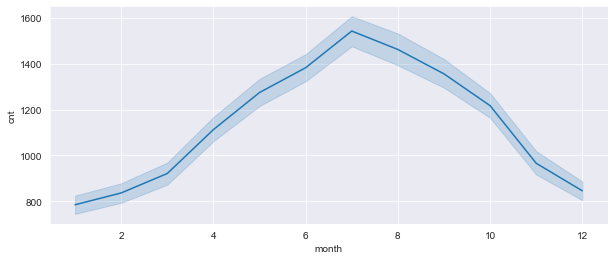

In [91]:
plt.figure(figsize=(10,4))
sns.lineplot(df.month, df.cnt)

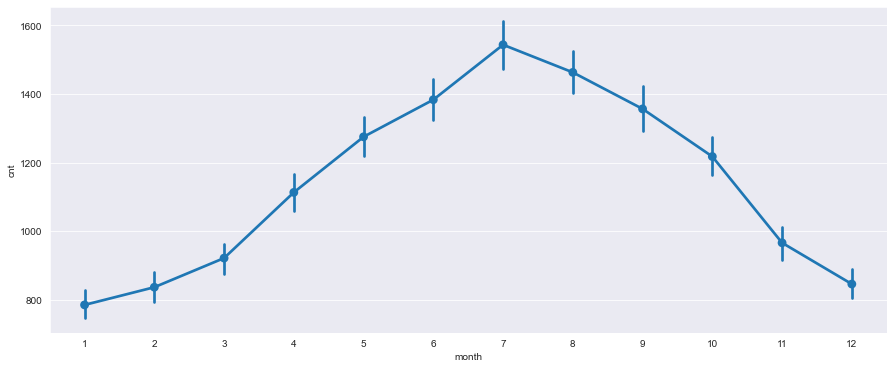

In [97]:
plt.figure(figsize=(15,6))
sns.pointplot(df.month, df.cnt);

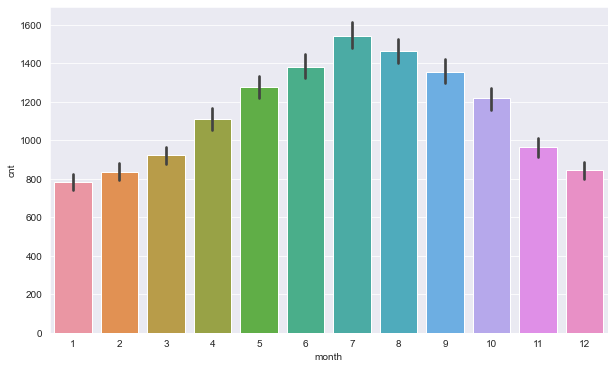

In [99]:
plt.figure(figsize=(10,6))
sns.barplot(df.month, df.cnt);

### 11.Plot bike shares by hours on (holidays, weekend, season)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

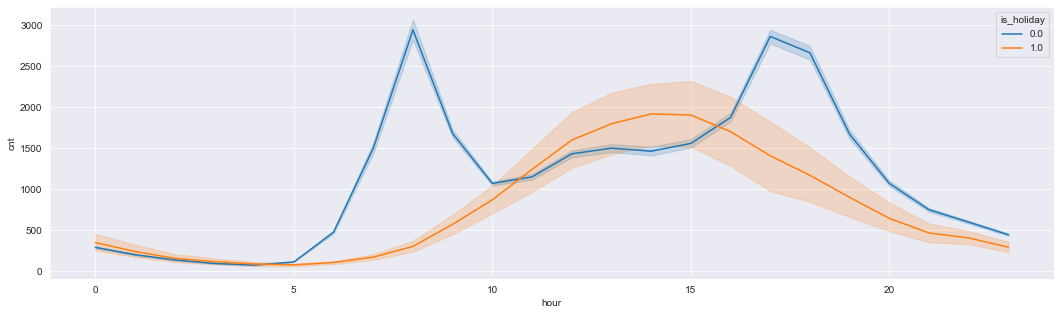

In [102]:
plt.figure(figsize=(18,5))
sns.lineplot(df.hour, df.cnt, hue = df.is_holiday)

<AxesSubplot:xlabel='hour', ylabel='cnt'>

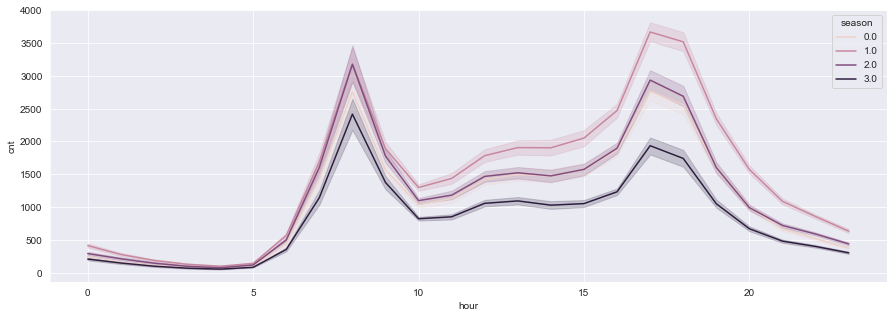

In [38]:
plt.figure(figsize=(15,5))
sns.lineplot(df.hour, df.cnt, hue = df.season)
# season 2 ve 0 iç içe

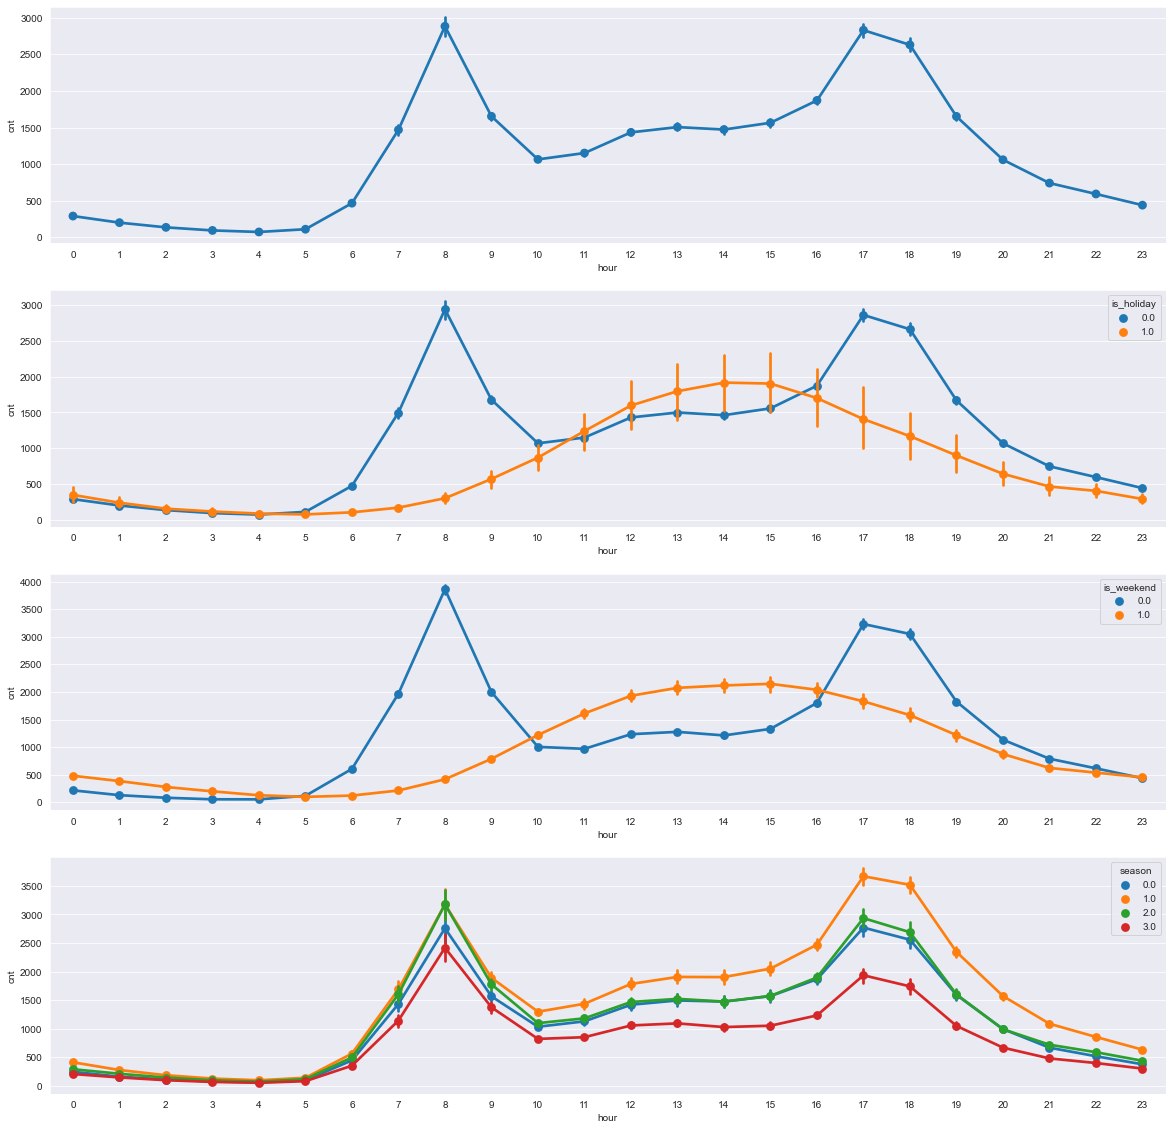

In [118]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
sns.pointplot(df.hour, df.cnt);

plt.subplot(4,1,2)
sns.pointplot(df.hour, df.cnt, hue = df.is_holiday);

plt.subplot(4,1,3)
sns.pointplot(df.hour, df.cnt, hue = df.is_weekend);

plt.subplot(4,1,4)
sns.pointplot(df.hour, df.cnt, hue = df.season);



### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

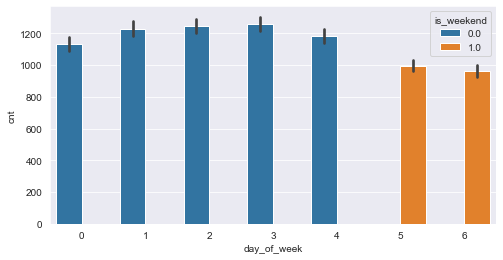

In [24]:
plt.figure(figsize=(8,4))
sns.barplot(df.day_of_week, df.cnt,hue=df.is_weekend)

<AxesSubplot:xlabel='day_of_week', ylabel='cnt'>

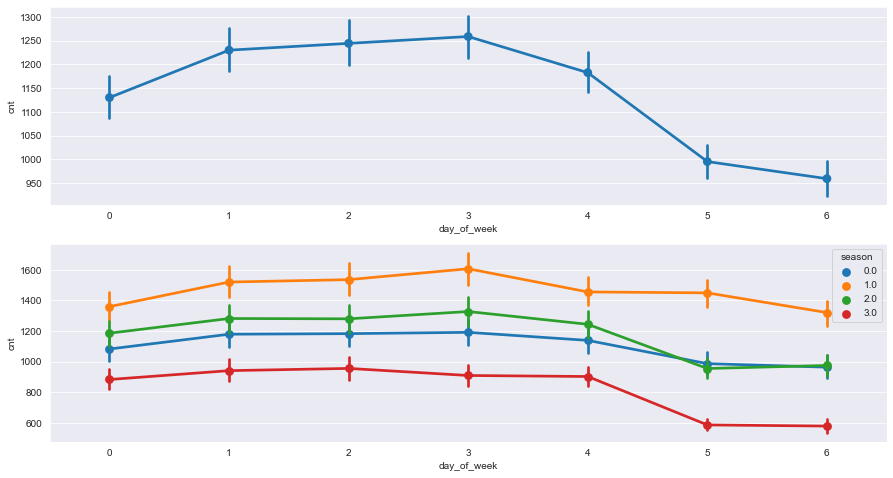

In [30]:
plt.figure(figsize = (15,8))
plt.subplot(2,1,1)
sns.pointplot(df.day_of_week,df.cnt)
plt.subplot(2,1,2)
sns.pointplot(df.day_of_week,df.cnt, hue = df.season)

### 13.Plot bike shares by day of month

In [44]:
df.groupby('day_of_month')[['cnt']].mean().astype('int').T

day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


day_of_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1127,1144,1140,1211,1194,1222,1261,1157,...,1127,1173,1054,1190,1081,1130,1062,1079,1156,968


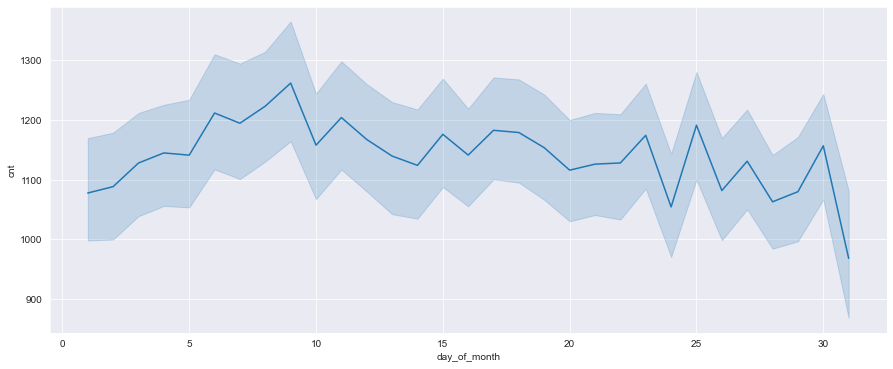

In [45]:
plt.figure(figsize=(15,6))
sns.lineplot(df.day_of_month,df.cnt);
df.groupby('day_of_month')[['cnt']].mean().astype('int').T

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


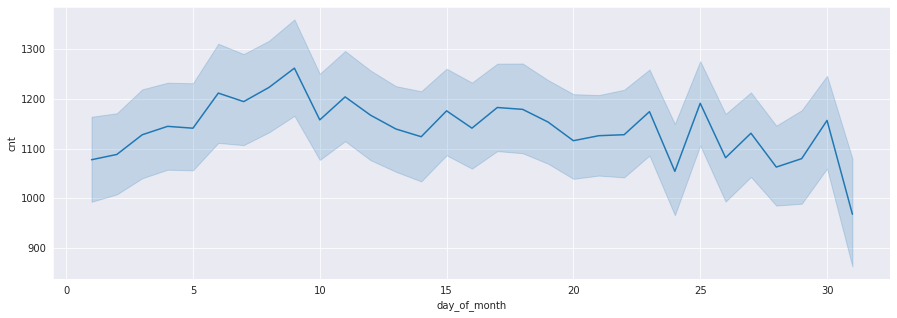

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

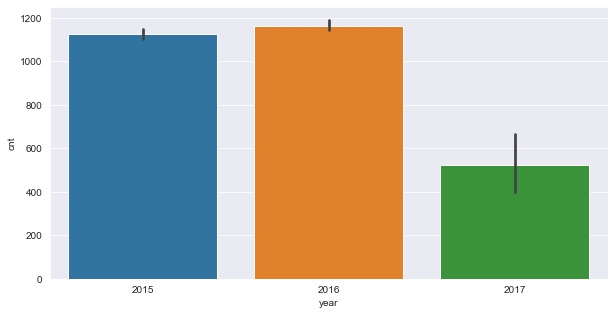

In [61]:
plt.figure(figsize=(10,5))
sns.barplot(df.year,df.cnt );

In [72]:
new = df[df.is_holiday == 1.0]

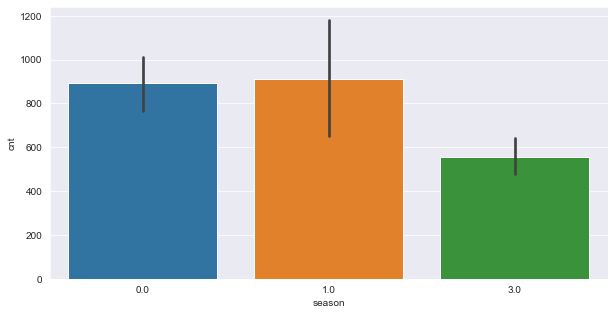

In [73]:
plt.figure(figsize=(10,5))
sns.barplot(new.season, new.cnt);
# estimator default olarak np.mean

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

<AxesSubplot:ylabel='is_weekend'>

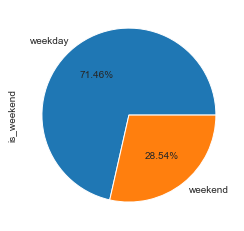

In [46]:
labels = ["weekday","weekend"]
df.is_weekend.value_counts().plot(kind = 'pie',labels= labels,autopct='%1.2f%%')

In [82]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

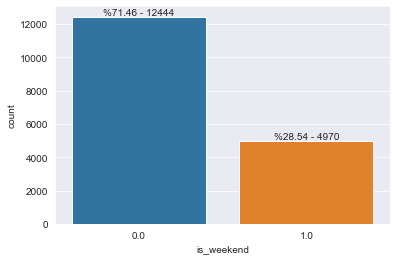

In [55]:
yüzde = df.is_weekend.value_counts(normalize=True).values*100
sns.countplot(df.is_weekend);
for index, value in enumerate(df.is_weekend.value_counts().values):
    plt.text(index, value, f"%{yüzde[index]:.2f} - {value}",ha = 'center', va = 'bottom')



### 16.Plot the distribution of weather code by seasons

<AxesSubplot:xlabel='weather_code', ylabel='count'>

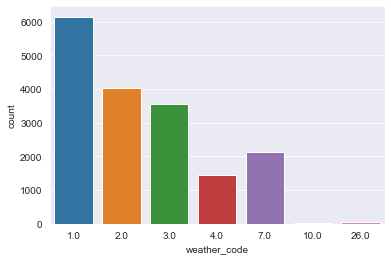

In [119]:
sns.countplot(df.weather_code)

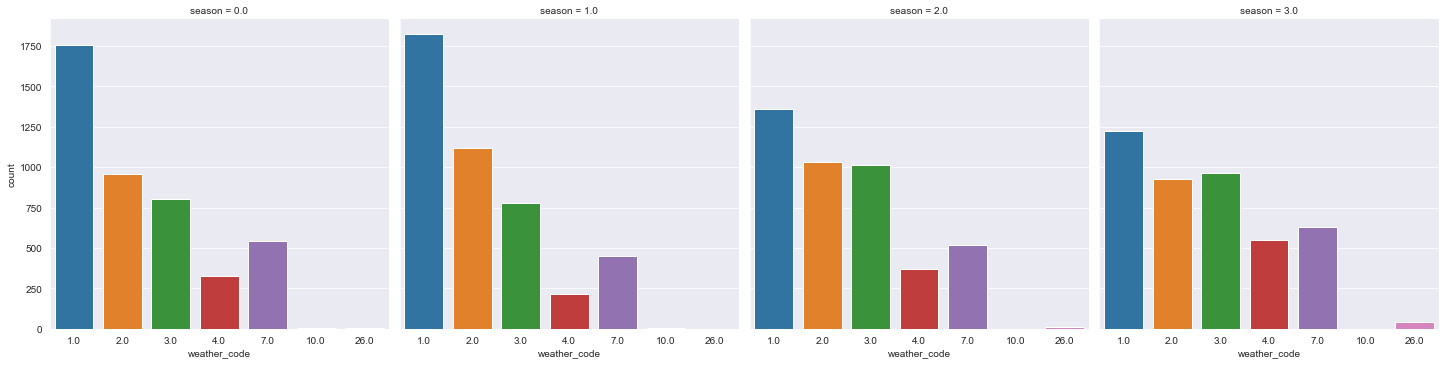

In [56]:
sns.catplot(x = "weather_code", col = "season", col_wrap = 4, data = df, kind="count");

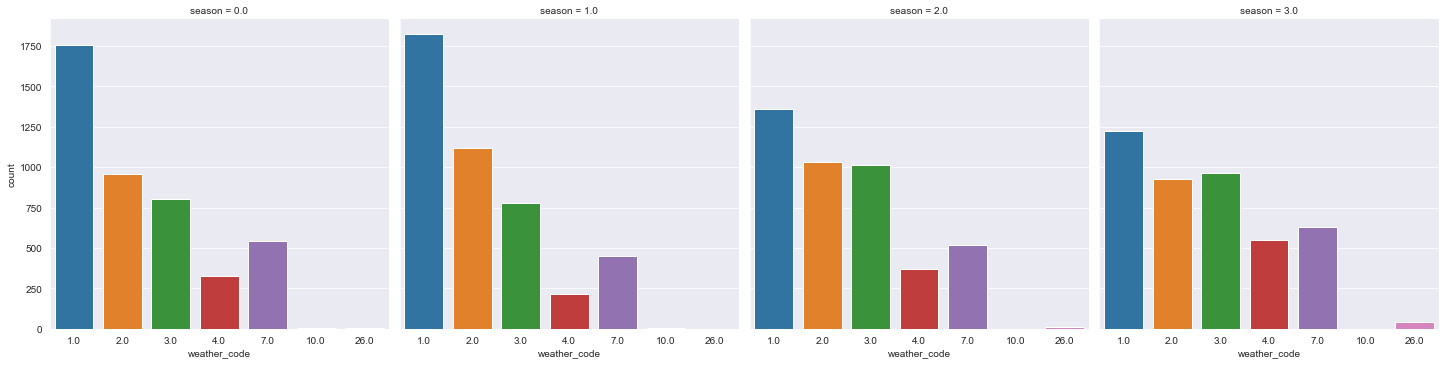

In [125]:
sns.catplot(kind = 'count',data = df, x = 'weather_code', col='season')

### 17.Visulaize all the continuous variables with histogram and scatterplot

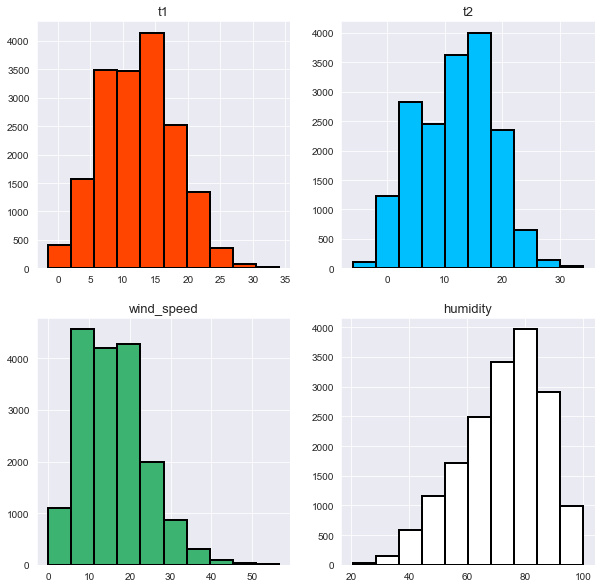

In [137]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))

axes[0][0].hist(df["t1"], bins = 10, color = "orangered", edgecolor = "black", linewidth = 2)
axes[0][1].hist(df["t2"], bins = 10, color = "deepskyblue", edgecolor = "black", linewidth = 2)
axes[1][0].hist(df["wind_speed"], bins = 10, color = "mediumseagreen", edgecolor = "black", linewidth = 2)
axes[1][1].hist(df["hum"], bins = 10, color = "White", edgecolor = "black", linewidth = 2)

axes[0][0].set_title("t1", fontsize = 13)
axes[0][1].set_title("t2", fontsize = 13)
axes[1][0].set_title("wind_speed", fontsize = 13)
axes[1][1].set_title("humidity", fontsize = 13)

plt.show()

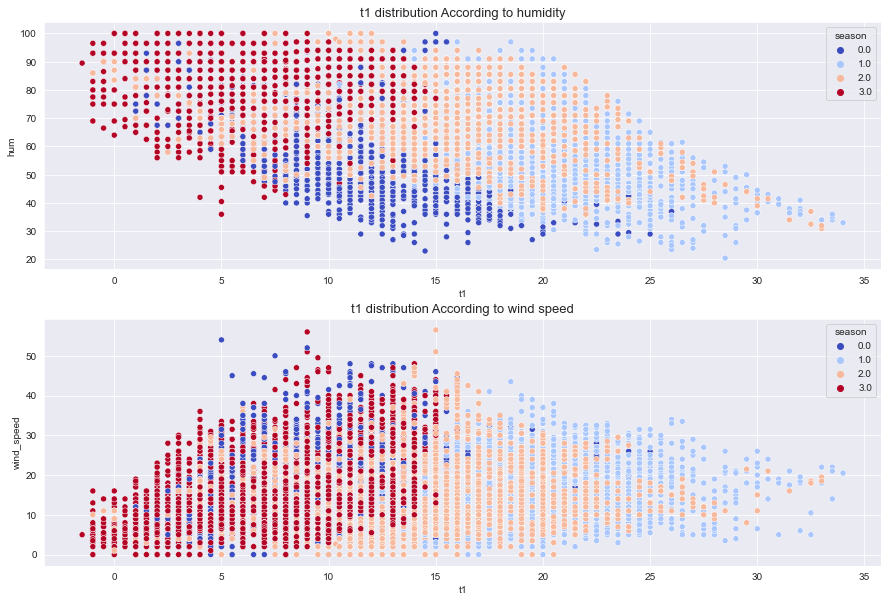

In [138]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
sns.scatterplot(data = df, x = "t1", y = "hum", palette = "coolwarm", hue = "season", ax = ax[0]).set_title("t1 distribution According to humidity", fontsize = 13)
sns.scatterplot(data = df, x = "t1", y = "wind_speed", palette = "coolwarm", hue = "season", ax = ax[1]).set_title("t1 distribution According to wind speed", fontsize = 13);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___